<h1>Chapter 03. Classification</h1>

<h2>MNIST</h2>

This chapter uses the Mixed National Institute of Standards and Technology (MNIST) dataset, which contains 70,000 small images of numbers handwritten by high school students and U.S. Census Bureau employees. Each image is labeled with the digit it represents.

In [1]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)
mnist

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # to avoid DataFrame use as_frame=False
mnist.keys()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

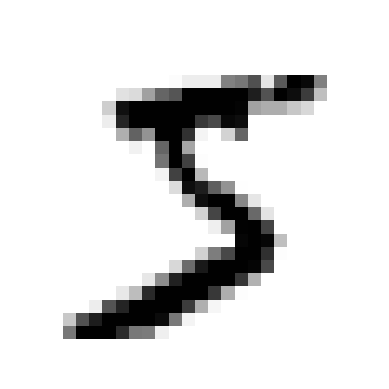

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(
    some_digit_image,
    cmap=mpl.cm.binary,
    interpolation='nearest',
)
plt.axis('off')
plt.show()

In [7]:
# Check some_digit target
y[0]

'5'

In [8]:
import numpy as np

# Convert the y data type to unsigned 8-bit integers (uint8).
y = y.astype(np.uint8)

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imsow(
        image,
        cmap=mpl.cm.binary,
        interpolation='nearest',
    )
    plt.axis('off')

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). First need to move the axes to combine
    # next to each other, using transpose(), and only then reshape
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Show a big_image
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

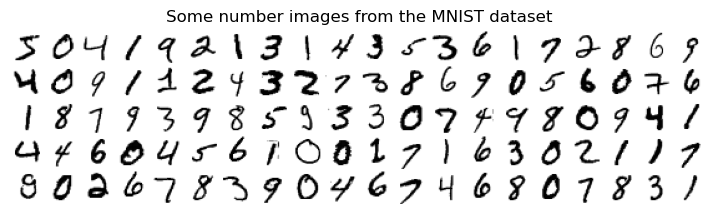

In [11]:
plt.figure(figsize=(9, 9))

example_impages = X[:100]
plot_digits(example_impages, images_per_row=20)

plt.title('Some number images from the MNIST dataset')
plt.show()

In [12]:
# Check tagret by index
y[4]

9

The MNIST dataset is already divided into a training set (first 60000 images) and a test set (last 10000 images)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

<h2>Training a Binary Classifier</h2>

In [14]:
y_train_5 = (y_train == 5)  # True for all 5 numbers, False for others
y_test_5 = (y_test == 5)

SGDClassifier: A fast and adaptable linear classifier for classification tasks.

In [15]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(
    max_iter=1000,  # max number of training iterations
    tol=1e-3,  # tolerane for stopping criteria
    random_state=42  # random seed for reproducibility
)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
# Check classifier
sgd_clf.predict([some_digit])

array([ True])

Evaluate a model's performance using cross_val_score.

In [17]:
from sklearn.model_selection import cross_val_score


cross_val_score(
    sgd_clf,
    X_train,
    y_train_5,
    scoring='accuracy',
    cv=3
)

array([0.95035, 0.96035, 0.9604 ])